# Reinforcement Learning

### Key Terms:

__Agent__: The learner or decision-maker that interacts with the environment. It observes the current state of the environment and takes actions based on its learned policy. 

__Environment__: The external system with which the agent interacts. It can be real-world scenarios, virtual simulations, games, or any other controlled environment. (ex: Training an AI to play Chess where the chessboard is the environment)

__State__: The current situation or configuration of the environment that the agent observes at any given time. (ex: every position in the chess game)

__Action__: The choices or decisions that the agent can make in response to a given state. (ex: moving a pawn, knight, etc.)

__Reward__: A numerical signal that represents the immediate feedback provided by the environment after the agent takes an action. It guides the agent towards favorable actions that lead to higher rewards.

__Policy__: The strategy or decision-making process of the agent. It maps states to actions and determines the agent's behavior.

__Episode__: A complete sequence of interactions that an agent has with its environment, starting from an initial state and continuing until a certain condition is met. Think of an episode as a mini-story where the agent makes decisions, takes actions, and receives feedback from the environment.

__Terminal State__: The last state in an episode. Think of it like the last move in a chess game.

### What is Reinforcement Learning?

*Reinforcement Learning* (RL) is a type of machine learning in which an agent* learns to make decisions by interacting with an environment. The agent observes the current state of the environment and takes actions based on its learned policy. The agent's objective is to maximize a cumulative reward over time by taking appropriate actions in different states of the environment.

In RL, the agent learns through a trial-and-error process, much like how humans and animals learn by receiving feedback from their actions. The environment provides feedback to the agent in the form of rewards or penalties based on the agent's actions. The agent's goal is to learn a policy, which is a mapping from states to actions, that leads to the most favorable outcomes and maximizes the total expected reward.

There are many applications of Reinforcement Learning such as robotics, autonomous vehicles, and finance. For today's lesson, we will look at Reinforcement Learning applied to board games like chess.

One cool underlying concept behing RL is *The Markov Principle*. It's often referred to as The Markov Property and it refers to the idea that the future state depends solely on the current state and not on the sequence of events that led to that state. This principle assumes that the environment's dynamics satisfy the property of memorylessness, where the historical sequence of moves and states leading up to the current position doesn't influence the future course of the game.

### Markov Decision Processes

A Markov Decision Process (MDP) is a simple framework that helps us make decisions in a sequential manner. It defines the relationship between some of the relevant key terms mentioned above.

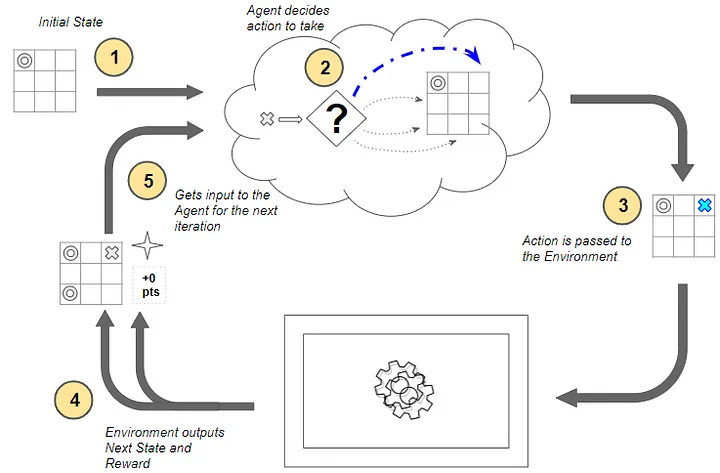

First there is an intial state. Using our chess example, there is the initial position of all the pieces for both sides. The agent (chess player)  would observe this current state and would select an action. After this action, the environment is now transitioned to a new state and there is a reward given to the agent. 

Thinking about this from a programming perspective, there is an intial state and intial action. The state increments after the action does, resulting in the reward incrementing as well. This occurs in a constant loop for the entire episode. The episode typically ends at a predefined time step or when a goal in reward collection is reached.

### How Actions Are Chosen:

Since the goal of the agent is to maximize rewards, the agent must optimize what actions it chooses. For that it uses three concepts known as __return__, __policy__, and __value__. We will explore these next.

#### Return

After every state, the agent accumulates __rewards__. It is important to note that each reward gets a discount or weight applied when they are being summed. This discount is represented by the variable, *gamma*. To learn more about the intuition behind *gamma* in relation to Reinforcement Learning, click <a href = "https://towardsdatascience.com/why-discount-future-rewards-in-reinforcement-learning-a833d0ae1942">here</a>.

The general rule of thumb is that the more recent a reward is, the less it will be weighted. Thinking in the context of a chess game, there may be a sequence of moves that has potential for capturing alot of your opponent's pieces in the future. However, maybe in the current state, there is a move that your opponent can choose that would allow them to checkmate you. It would be wise to choose the move that prevents checkmate on our end since we would prioritize keeping the game going over capturing pieces. In other words, we prioritized the most recent state over future rewards.

Another rule of thumb is to prioritize __long term large__ rewards over large __immediate__ rewards. Using our chess example, maybe you can win a ton of material in more current states. This aggressive playstyle might potentially weaken your defense, allowing for your opponent to eventually win material back or even checkmate you. This short term material advantage may pale in comparision to playing more passively in current states to strengthen your defense and gain a good tactical position, giving you a chance to win material in future states and potentially win the game. In this case, the long term rewards would be more favorable for the agent.

#### Policy

The next important concept is __policy__. As mentioned in the key terms list, a policy refers to the strategy that the agent takes. More generally, the policy is a way to map a specific action to a given state.

It might be helpful to view a policy as a lookup table: 

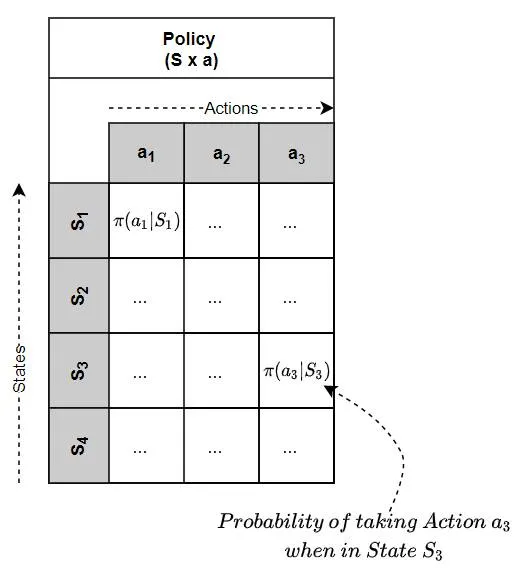

Policies can either be __Deterministic__ or __Stochastic__. A __Deterministic Policy__ has a fixed action for a certain state. Using our chess example, a Deterministic Policy would be deciding to castle on the 4th move every game. A __Stochastic Policy__ varies the action based off of the probabilities for each action in a state. Maybe in a chess tournament, it might be helpful to switch up your playstyle to stay unpredictable.

#### Value

__Value__ refers to the sum of rewards given a state over many episodes. Remembering that an episode is a collection of states, Value is also known as the Long Term Return.

There are 2 types of Value. The first is a __State Value__. This refers to the expected Return from a given state, by executing actions based on a given policy from that state onward. It can also be understood as a lookup table: 

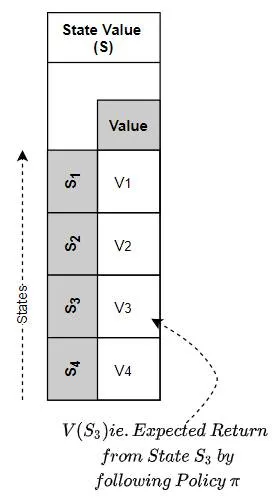

The other type is a __State Action Value__. This refers to the expected Return by taking a given action from a given state, and then, by executing actions based on a given policy after that. See the lookup table below to understand visually:

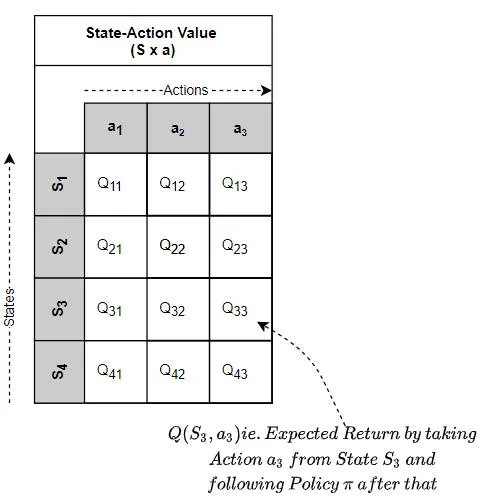

The key difference is that State Value is the Return predicted by just the given state and policy while State Action Value is the Return predicted with an action from a given state and policy. You can think of the action as an added *parameter* when predicting the return for State Action Value.

Intuitively one can think of Value as follows. Like a human, the agent learns from experience. As it interacts with the environment and completes episodes, it obtains the Returns for each episode. As it accumulates more experience (ie. obtains Returns for more and more episodes), it gets a sense of which states, and which actions in those states yield the most Return. It stores this ‘experience’ as ‘Value’.

### Value Function and Bellman Equation

The __value function__ is a core concept in RL that quantifies the expected cumulative reward an agent can achieve starting from a specific state and following a certain policy. In other words, it tells the agent how good it is in a particular state (or state-action pair) while following a specific policy.

The value function provides crucial information to the agent about which states are more favorable and likely to lead to higher cumulative rewards. By comparing the value functions of different states, an agent can make decisions to maximize its long-term rewards. In relation to the previous section, the value function allows us to actually calculate State Values or State Action Values. Since there are two types of Values, there are two types of value functions. See the image below for these functions:

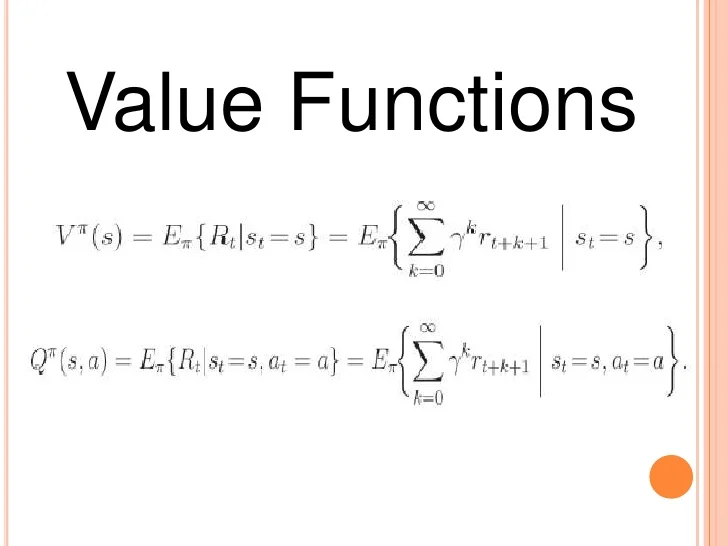

There are actually several __Bellman Equations__. The __Bellman Equations__ in the context of the value function are __recursive relationships__ that characterize the relationship between the value of a state (or state-action pair) and the values of its successor states. The two most common Bellman Equations are the ones associated with the State-Value function and the State-Action Value function. These equations help define the relationships between different values and rewards in a reinforcement learning setting. 

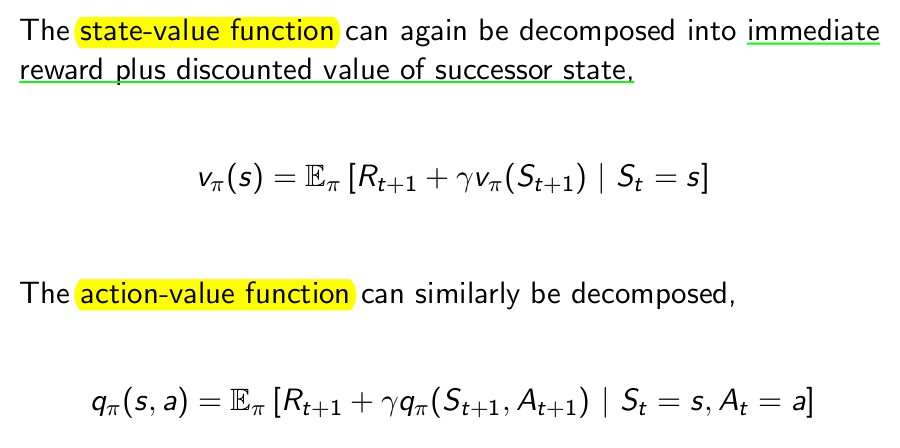

The Bellman Equations expresses the value of a state as the sum of immediate rewards and the discounted value (remember that this is called *gamma*) of the next state, considering all possible actions and successor states. It forms the foundation for many RL algorithms and methods to estimate and optimize the value function.

To better understand the Bellman Equations, it is helpful to understand how recursion works.

#### Recursion

__Recursion__ is like a puzzle where you solve a big problem by breaking it down into smaller pieces of the same problem. It's like solving a jigsaw puzzle by solving one piece at a time, and each piece might have more pieces that you solve in the same way.

Here's an image of recursion being used to calculate factorials:

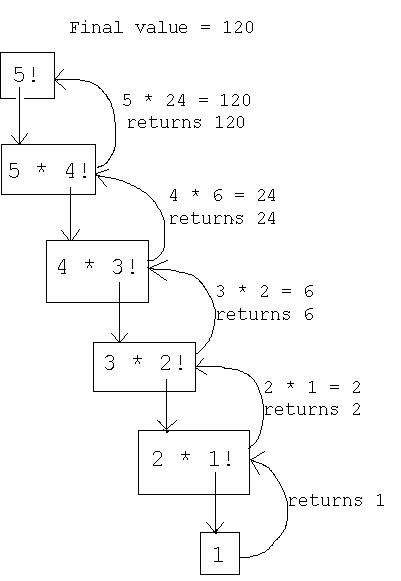

Here, we start with finding 5!. The logic is that 5! is composed of 5 * 4! and 4! is composed of 4 * 3! and so on until we reach 1. Then we climb back up by plugging in 1 for 1!, simplifying 2! into 2 * 1.  Now 2! is solved for so we plug that in for 2!, allowing us to simplify 3 * 2! to 3 * 2. This repeats until we have solved for 5!

In the context of the Bellman equation, it's a bit like asking: "How much value does a certain action or state have?" To answer that, you break it down into two parts:

__Immediate Part__: You look at the reward you get right now from that action or state. This is like understanding the piece of the puzzle that's right in front of you.

__Future Part__: You think about what will happen next. This is where recursion comes in. To know how good the future will be, you look at the value of where you'll end up next. This value itself is found by applying the same process – breaking it down into immediate rewards and future values. It's like each puzzle piece leads to another puzzle piece.

By putting these two parts together, you get the full value of that action or state. And since some of those future pieces themselves depend on even more pieces, you keep doing this until you've solved the whole puzzle – you've figured out the value of each action or state based on rewards and values of other actions or states down the line.

In summary, the value function quantifies the *expected* rewards in a state, and the Bellman Equations provide a recursive way to express the value of a state in terms of its *immediate* reward and the value of its successor states. The Bellman Equations allow us to calculate how good a state or state-action is, giving the agent necessary inputs to optimize its policies and its state-action pairs. These concepts are fundamental in reinforcement learning for decision-making and optimization.

<a href = "https://www.youtube.com/watch?v=_j6pvGEchWU">Here </a>is a video that explains the Bellman Equation more in depth.

### Monte Carlo Method

The concepts of the __Value Function__ and the __Bellman Equations__ lay the foundation for the Monte Carlo method in reinforcement learning. These topics provide the theoretical framework that the __Monte Carlo__ method utilizes to estimate value functions and improve an agent's policy.

In the context of reinforcement learning and other fields, the Monte Carlo method involves using *randomness* to simulate various scenarios or trials and then averaging the results to *approximate* an unknown quantity, such as expected values, probabilities, or outcomes. See the image below to see how the mathematical constant, pi, can be approximated using the Monte Carlo Method:


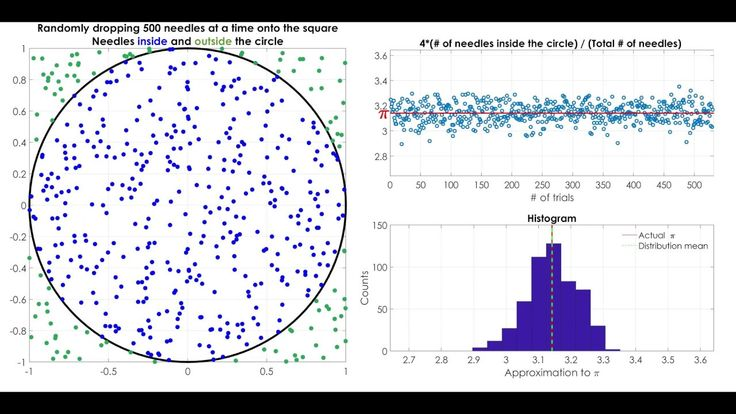

In reinforcement learning specifically, the Monte Carlo method is a powerful technique used in reinforcement learning to estimate value functions and solve the Bellman Equations through simulation and averaging. Let's break down how the Monte Carlo method relates to the Bellman Equations:

Recall that the Bellman Equations express the relationships between values of states (or state-action pairs) in terms of immediate rewards and values of future states. 

#### Simulating Episodes
In the context of the Bellman Equations, you start by simulating an episode (a sequence of states, actions, and rewards) using your __policy__. You let the agent interact with the environment and record the states it visits, the actions it takes, and the rewards it receives along the way.

#### Calculating Rewards
Once the episode is complete, you calculate the __return__ for each state visited. Recall that the return is the cumulative sum of rewards from that state until the end of the episode. This return is an estimate of the __total expected future rewards__ the agent will receive starting from that state.

#### Update Value Function
After many episodes, you update the value function by *averaging* the returns obtained for each state. This is where the Monte Carlo method comes in: you're using simulations to estimate the expected cumulative rewards (values) for each state.

The Monte Carlo method is related to the Bellman Equations through the idea of estimating values based on actual interactions with the environment. When you calculate the returns and average them over multiple episodes, you're essentially approximating the value of states in a way that aligns with the Bellman equation's recursive structure.

By repeatedly running episodes, updating value estimates, and iteratively improving the policy, the Monte Carlo method helps the agent learn and refine its decision-making process to maximize cumulative rewards in a given environment.

<span style = "background-color: yellow">
TODO: Reinforcement Learning is pretty difficult to set up programming-wise, which is why this lesson was mostly conceptual. To make up for this, watch this 
<a href="https://www.youtube.com/watch?v=L8ypSXwyBds&t=549s&pp=ygUrcmVpbmZvcmNlbWVudCBsZWFybmluZyBwcm9qZWN0IHdpdGggcHl0b3JjaA%3D%3D">video</a>. This should give you a sense of what it looks like to apply the full scope of reinforcement learning in a coding project.
</span>